# Fit Model


In [1]:
import pandas as pd
import mlutils
from sklearn import svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# column names
feature_col = "features" # feature vector
value_col = "foldType" # fold type to be predicted

### Read data set with fold type classifications and feature vectors

In [3]:
df = pd.read_json("./features.json")

In [4]:
print("Total number of data:", df.shape[0])
df.head(2)

Total number of data: 5368


,Exptl.,FreeRvalue,R-factor,alpha,beta,coil,features,foldType,length,ngram,pdbChainId,resolution,secondary_structure,sequence
1,XRAY,0.26,0.19,0.469945,0.046448,0.483607,"[0.3690354149, 0.3921923932, -0.3317341206, -0...",alpha,366,"[SR, RM, MP, PS, SP, PP, PM, MP, PV, VP, PP, P...",16VP.A,2.1,CCSCCCCCCCCHHHHHHHHHHHHTCTTHHHHHHHHHHCCCCCSTTS...,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...
1000,XRAY,0.23,0.18,0.504630,0.004630,0.490741,"[0.4600808152, 0.11398545060000001, -0.2394382...",alpha,216,"[ME, EA, AD, DV, VE, EQ, QQ, QA, AL, LT, TL, L...",1PBW.B,2.0,CCCCCCCCCCCCCCHHHHCCTTSCSCHHHHHHHHHHHHHHTTCTTT...,MEADVEQQALTLPDLAEQFAPPDIAPPLLIKLVEAIEKKGLECSTL...


## Split dataset into a training and test set

In [5]:
train, test = train_test_split(df, test_size=0.25, random_state=13, stratify=df[value_col])
print("Train set size:", train.shape[0])
print(train[value_col].value_counts())
print()
print("Test set size:", test.shape[0])
print(test[value_col].value_counts())
train.head(2)

Train set size: 4026
alpha         2107
alpha+beta    1264
beta           655
Name: foldType, dtype: int64

Test set size: 1342
alpha         703
alpha+beta    421
beta          218
Name: foldType, dtype: int64


,Exptl.,FreeRvalue,R-factor,alpha,beta,coil,features,foldType,length,ngram,pdbChainId,resolution,secondary_structure,sequence
3697,XRAY,0.20,0.17,0.260417,0.304688,0.434896,"[0.5790818751, 0.2756040054, -0.0346692574, -0...",alpha+beta,384,"[MS, SE, ER, RA, AP, PL, LV, VI, II, IG, GT, T...",2V3A.A,2.4,CCCCCCEEEECCSHHHHHHHHHHHTTCSSSCEEEECSSCCCEECGG...,MSERAPLVIIGTGLAGYNLAREWRKLDGETPLLMITADDGRSYSKP...
6734,XRAY,0.18,0.16,0.808219,0.000000,0.191781,"[0.291751451, 0.1482209101, 0.2176499888, 0.14...",alpha,73,"[GP, PL, LG, GS, SM, MS, ST, TK, KT, TN, NI, I...",3PP5.A,1.5,CCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,GPLGSMSTKTNIQKDWEQREFIEDMSINIQKIVEFLNKFELSTRNK...


## Train a classifier

In [6]:
classifier = svm.SVC(gamma='auto', class_weight='balanced', random_state=13)
#classifier = LogisticRegression(class_weight='balanced')
#classifier = RandomForestClassifier(random_state=13, class_weight='balanced')

classifier.fit(train[feature_col].tolist(), train[value_col].tolist())

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

## Make prediction for test set

In [7]:
predicted = classifier.predict(test[feature_col].tolist())
expected = test[value_col].tolist()

## Calculate metrics for test set

Classification metrics:

             precision    recall  f1-score   support

      alpha       0.86      0.73      0.79       703
 alpha+beta       0.60      0.71      0.65       421
       beta       0.68      0.78      0.73       218

avg / total       0.75      0.73      0.74      1342



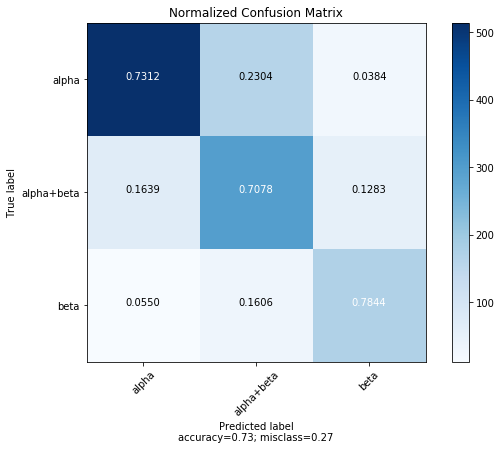

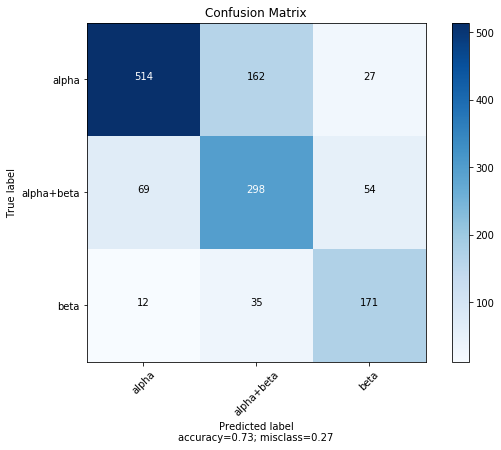

In [8]:
cm = metrics.confusion_matrix(expected, predicted)
print("Classification metrics:\n")
print(metrics.classification_report(expected, predicted))
mlutils.plot_confusion_matrix(cm, classifier.classes_, normalize=True, title='Normalized Confusion Matrix')
mlutils.plot_confusion_matrix(cm, classifier.classes_, normalize=False, title="Confusion Matrix")